<a href="https://colab.research.google.com/github/LerinaMM/commodities/blob/main/commodities_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Imports

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

from matplotlib import pyplot as plt

from IPython.display         import Image
from IPython.core.display    import HTML

warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [ ]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:75% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings()

# 1.0 Coleta dos dados

In [ ]:
# dólar
df_dolar = pd.read_csv('/content/USD_BRL_Historical_Data.csv')
for i in df_dolar.columns[1:5]:
    df_dolar[i] = df_dolar[i].astype(float)
# preenchendo NaNs com valores imediatamente anteriores ao valor da linha atual
df_dolar['Vol.'].fillna(0)

# gold
df_gold = pd.read_csv('/content/Gold_Futures_Historical_Data.csv')
for i in df_gold.columns[1:5]:
    df_gold[i] = df_gold[i].str.replace(',', '').astype(float)
df_gold['Vol.'].fillna(method = 'ffill', inplace = True)

# petróleo tipo brent
df_oil = pd.read_csv('/content/Brent_Oil_Futures_Historical_Data.csv')
for i in df_oil.columns[1:5]:
    df_oil[i] = df_oil[i].astype(float)
df_oil['Vol.'].fillna(method = 'ffill', inplace = True)

# gás natural
df_gas = pd.read_csv('/content/Natural_Gas_Futures_Historical_Data.csv')
for i in df_gas.columns[1:5]:
    df_gas[i] = df_gas[i].astype(float)
df_gas['Vol.'].fillna(method = 'ffill', inplace = True)

# trigo (us wheat)
df_wheat = pd.read_csv('/content/US_Wheat_Futures_Historical_Data.csv')
for i in df_wheat.columns[1:5]:
    df_wheat[i] = df_wheat[i].str.replace(',', '').astype(float)
df_wheat['Vol.'].fillna(0)

# adicionando uma coluna identificando cada tipo de commodity
df_dolar.loc[:,'Symbol'] = 'Dolar'
df_gold.loc[:,'Symbol'] = 'Gold'
df_oil.loc[:,'Symbol'] = 'Brent Oil'
df_gas.loc[:,'Symbol'] = 'Natural Gas'
df_wheat.loc[:,'Symbol'] = 'US Wheat'

# concatenação dos datasets de cada uma das commodities em um único dataset
df_all = pd.concat([df_dolar, df_gold, df_oil, df_gas, df_wheat])

# reorganizando colunas
df_all = df_all[['Symbol', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']]
df_all = df_all.rename(columns={"Vol.": "Volume", "Change %": "Change"})

# alterando tipo dos dados
df_all['Change'] = df_all['Change'].str.replace('%', '')
df_all['Volume'] = df_all['Volume'].str.replace('K', '0')
df_all['Volume'] = df_all['Volume'].str.replace('M', '0000')
df_all['Volume'] = df_all['Volume'].str.replace('.', '')
df_all['Date'] = df_all['Date'].str.replace('/', '-')
df_all['Date'] = pd.to_datetime(df_all['Date'])
for i in df_all.columns[2:]:
    df_all[i] = df_all[i].astype(float)

# preenchendo NaNs restantes
df_all['Volume'].fillna(0)

# descrição básica dos dados
print('Os nomes das colunas são: \n{}\n'.format(df_all.columns))
print('As colunas e os tipos do conjunto de dados são: \n{}\n'.format(df_all.dtypes))
print('O tamanho do conjunto de dados é (linhas, colunas): \n{}\n'.format(df_all.shape))
print('A quantidade de linhas vazias para cada coluna é: \n{}\n'.format(df_all.isna().sum()))
print('As commodities selecionadas são: \n{}'.format(df_all['Symbol'].unique()))

df_all.head()

Os nomes das colunas são: 
Index(['Symbol', 'Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

As colunas e os tipos do conjunto de dados são: 
Symbol            object
Date      datetime64[ns]
Price            float64
Open             float64
High             float64
Low              float64
Volume           float64
Change           float64
dtype: object

O tamanho do conjunto de dados é (linhas, colunas): 
(24994, 8)

A quantidade de linhas vazias para cada coluna é: 
Symbol       0
Date         0
Price        0
Open         0
High         0
Low          0
Volume    5471
Change       0
dtype: int64

As commodities selecionadas são: 
['Dolar' 'Gold' 'Brent Oil' 'Natural Gas' 'US Wheat']


,Symbol,Date,Price,Open,High,Low,Volume,Change
0,Dolar,2023-03-03,5.1956,5.2011,5.2302,5.1820,130120.0,-0.10
1,Dolar,2023-03-02,5.2006,5.1796,5.2288,5.1795,136090.0,0.41
2,Dolar,2023-03-01,5.1794,5.2369,5.2369,5.1747,147800.0,-1.09
3,Dolar,2023-02-28,5.2367,5.2013,5.2519,5.1788,135710.0,0.69
4,Dolar,2023-02-27,5.2008,5.2071,5.2134,5.1706,132420.0,-0.18


# 2.0 Análise estatística dos atributos numéricos

## 2.1 Estatística descritiva

In [ ]:
df_all.describe()

,Price,Open,High,Low,Volume,Change
count,24994.000000,24994.000000,24994.000000,24994.000000,1.952300e+04,24994.000000
mean,376.710596,376.794269,380.571333,372.886913,1.266022e+05,0.035136
std,520.895562,521.037222,525.344749,516.428188,9.612098e+04,2.212049
min,1.482000,0.000000,0.000000,0.000000,0.000000e+00,-24.400000
25%,3.809000,3.812125,3.867775,3.759050,5.141500e+04,-0.900000
50%,69.880000,69.970000,70.825000,68.850000,1.087400e+05,0.000000
75%,612.500000,612.720000,619.500000,605.130000,1.791150e+05,0.930000
max,2069.400000,2076.400000,2089.200000,2049.000000,1.080000e+06,30.700000


## 2.2 Análise univariada

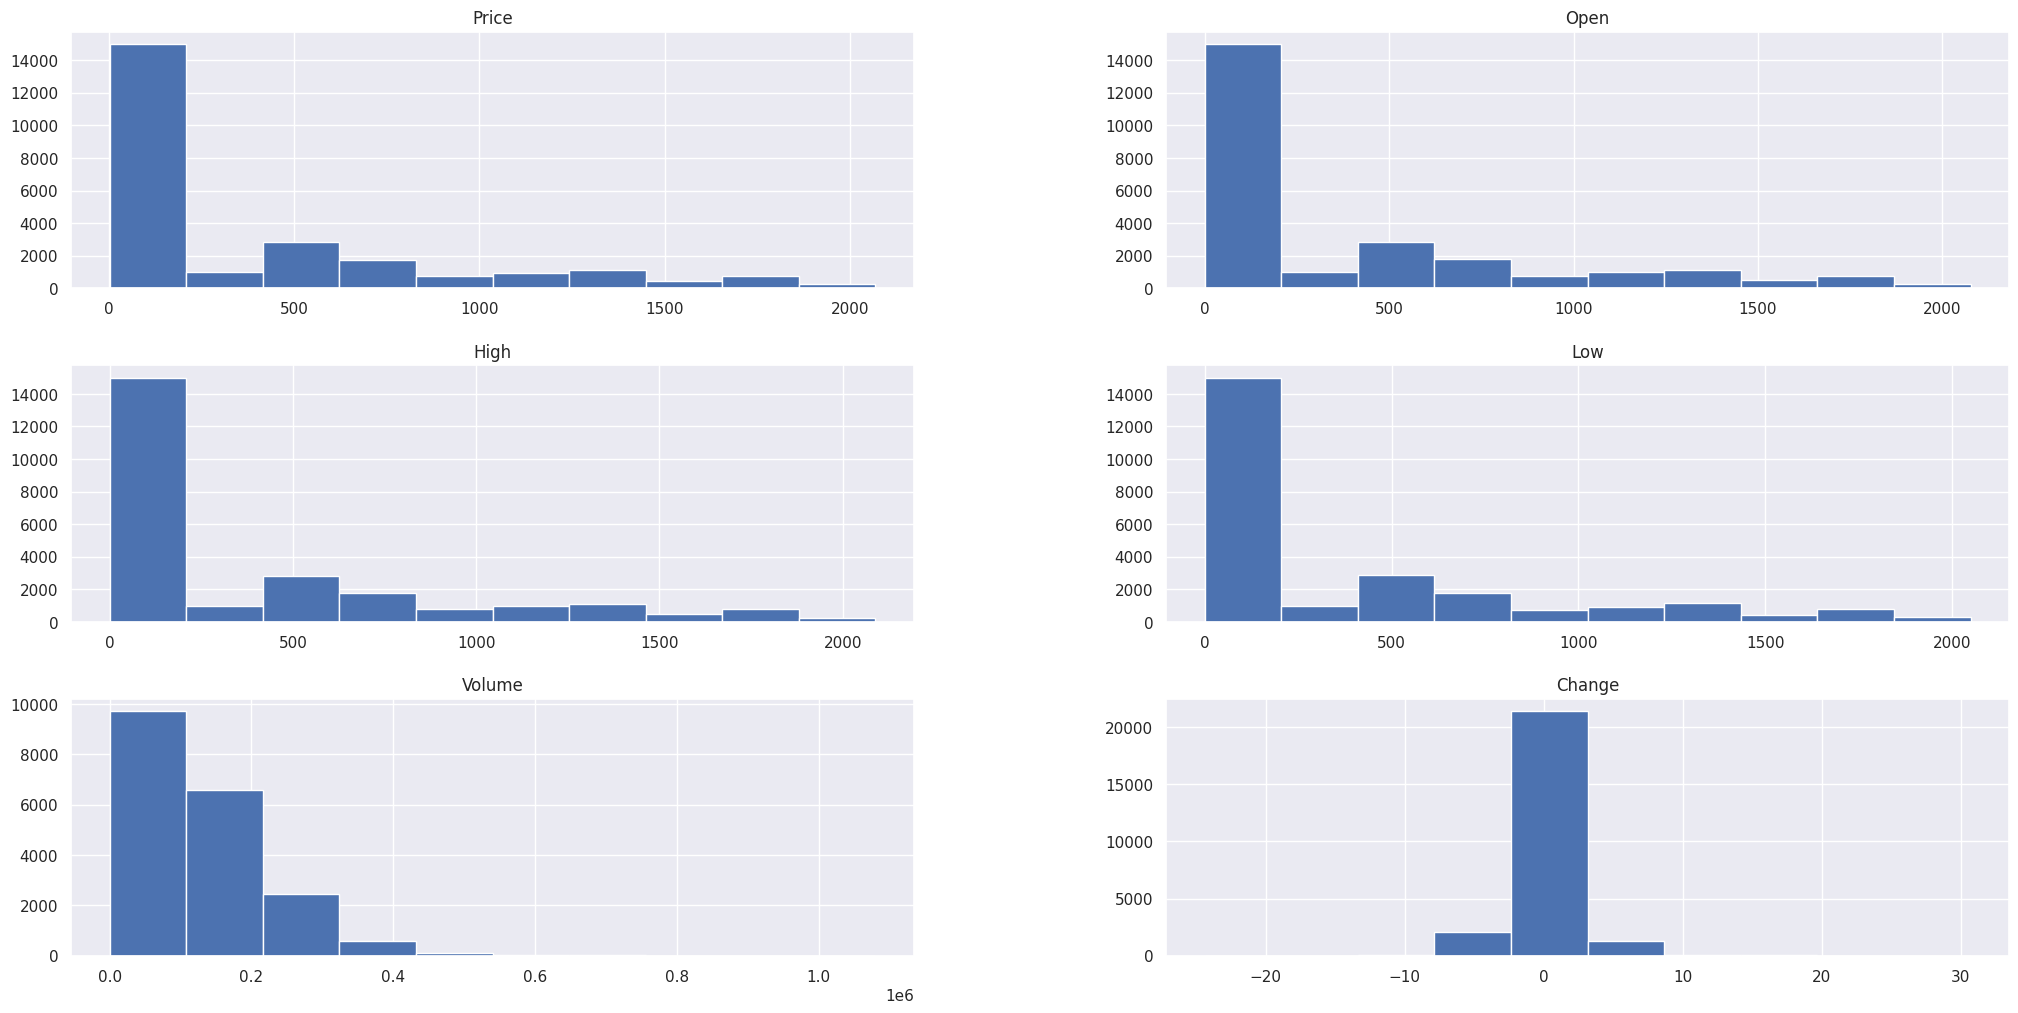

In [ ]:
num_attributes = df_all.select_dtypes(include = ['int64','float64'])
num_attributes.hist();

In [ ]:
# exportando para csv
df_all_bi = df_all[df_all['Date'] <= '2023-01-01']
df_all_bi.to_csv('df_all_bi.csv', index = False)

# 3.0 Análise estatística das commodities e do dólar

## 3.1 Volume

In [ ]:
df_volume = df_all.copy()

# breve limpeza do dataset dos volumes
df_volume = df_volume[df_volume['Date'] <= '2023-01-01']
df_volume = df_volume.pivot(index = 'Date', columns = 'Symbol', values = 'Volume')

df_volume = df_volume.fillna(0)

In [ ]:
# tabela de estatística descritiva dos valores dos volumes
df_volume.describe()

Symbol,Brent Oil,Dolar,Gold,Natural Gas,US Wheat
count,5139.000000,5139.000000,5139.000000,5139.000000,5.139000e+03
mean,166023.740027,19431.521697,153381.726017,102118.476357,2.864987e+04
std,108091.084473,44038.844377,101812.272061,66179.417788,4.870473e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,77195.000000,0.000000,80445.000000,45800.000000,0.000000e+00
50%,160730.000000,0.000000,142030.000000,99730.000000,1.440000e+04
75%,242185.000000,0.000000,205035.000000,145940.000000,4.831500e+04
max,779720.000000,244220.000000,816530.000000,459200.000000,1.080000e+06


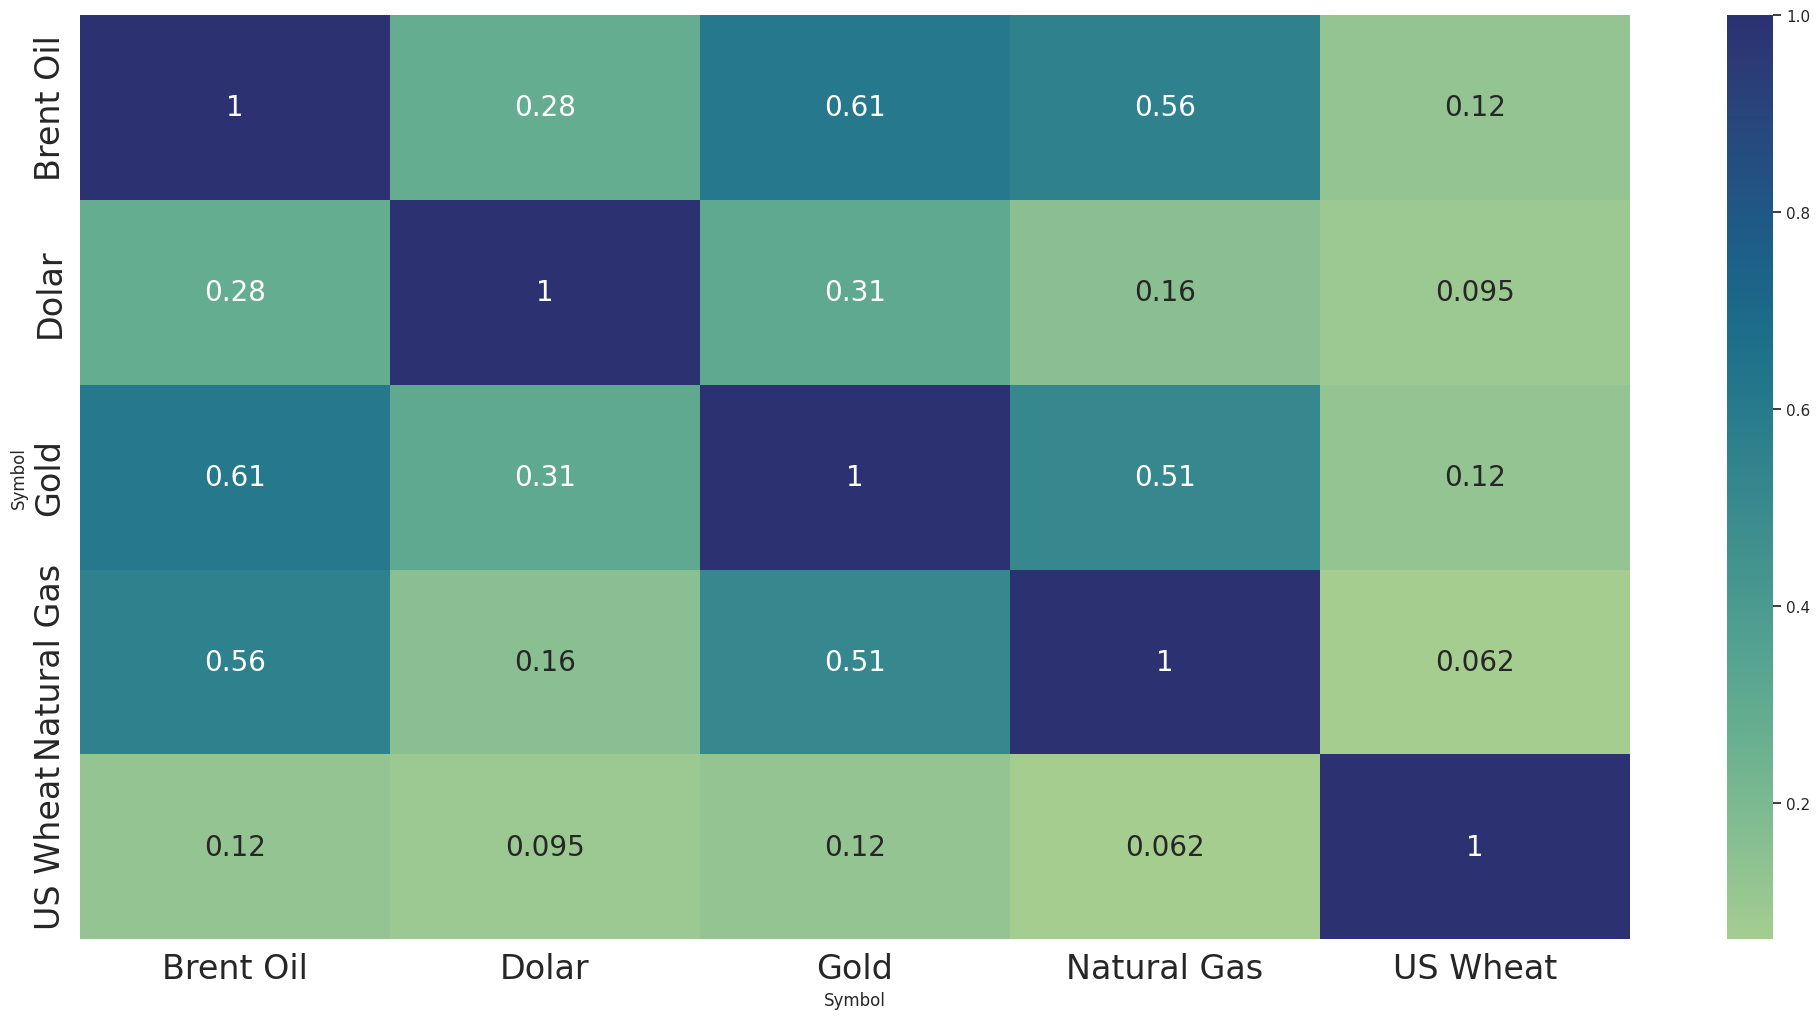

In [ ]:
# plotando as correlações entre os volumes das commodities
correlation = df_volume.corr(method = 'pearson')
ax = sns.heatmap(correlation, cmap = "crest", annot = True, annot_kws={"size": 20});
ax.set_yticklabels(ax.get_yticklabels(), size=24);
ax.set_xticklabels(ax.get_xticklabels(), size=24);

In [ ]:
# exportando o dataset para um csv
df_volume_bi = df_volume.reset_index()
df_volume_bi.to_csv('df_volume_bi.csv', index = False)

## 3.2 Variação percentual

In [ ]:
df_change = df_all.copy()

# breve limpeza do dataset da variação percentual
df_change = df_change[df_change['Date'] <= '2023-01-01']
df_change = df_change.pivot(index = 'Date', columns = 'Symbol', values = 'Change')

df_change = df_change.fillna(0)

In [ ]:
# tabela de estatística descritiva da variação percentual
df_change.describe()

Symbol,Brent Oil,Dolar,Gold,Natural Gas,US Wheat
count,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000
mean,0.046056,0.016955,0.034767,0.048097,0.037926
std,2.262620,1.023037,1.090949,3.319437,2.176794
min,-24.400000,-8.000000,-9.340000,-19.070000,-14.060000
25%,-1.000000,-0.520000,-0.440000,-1.740000,-1.175000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.100000,0.510000,0.570000,1.610000,1.130000
max,21.020000,7.430000,8.970000,30.700000,22.430000


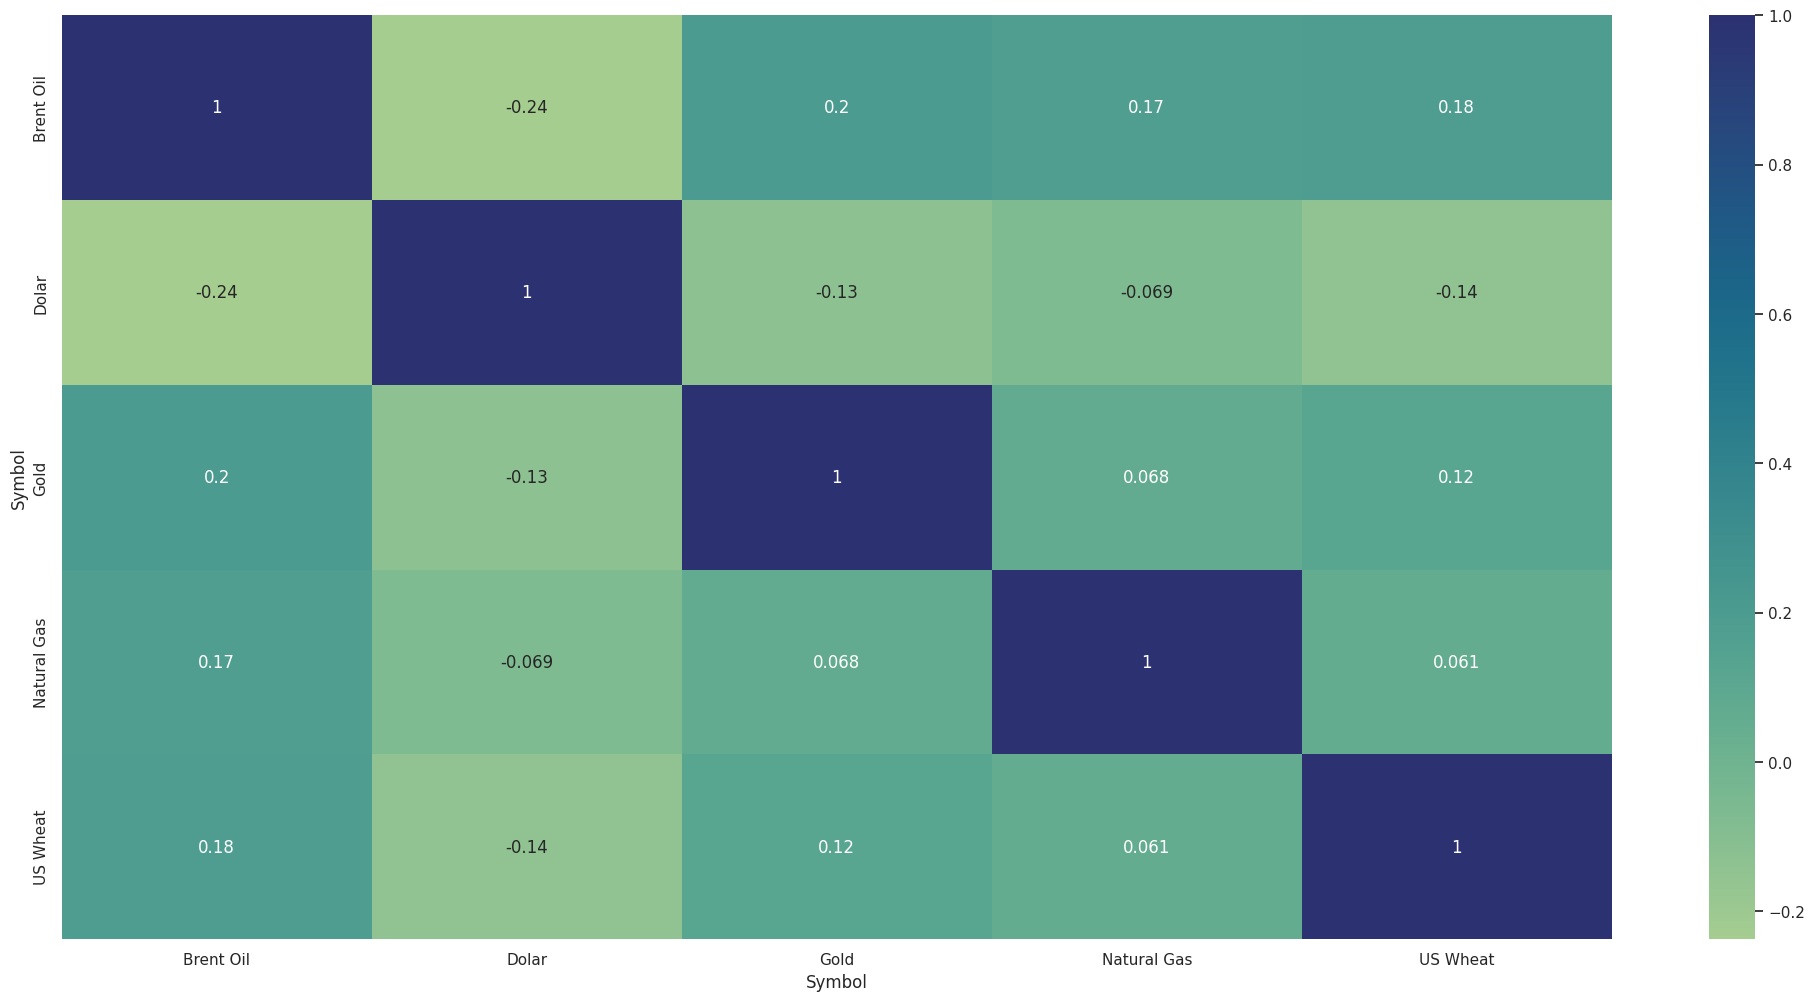

In [ ]:
# plotando as correlações entre os variações percentuais das commodities
correlation = df_change.corr(method = 'pearson')
sns.heatmap(correlation, cmap = "crest", annot = True);

In [ ]:
# exportando o dataset para um csv
df_change_bi = df_change.reset_index()
df_change_bi.to_csv('df_change_bi.csv', index = False)

## 3.3 Preços

In [ ]:
df_price = df_all.copy()

# breve limpeza do dataset dos preços
df_price = df_price[df_price['Date'] <= '2023-01-01']
df_price = df_price.pivot(index = 'Date', columns = 'Symbol', values = 'Price')

df_price = df_price.fillna(method = 'ffill')
df_price = df_price.fillna(method = 'bfill')

In [ ]:
# tabela de estatística descritiva dos preços
df_price.describe()

Symbol,Brent Oil,Dolar,Gold,Natural Gas,US Wheat
count,5139.000000,5139.000000,5139.000000,5139.000000,5139.000000
mean,74.616114,2.954447,1211.889930,4.599213,576.548455
std,25.820981,1.207547,434.258626,2.340539,176.642289
min,19.330000,1.538300,374.900000,1.482000,283.500000
25%,54.750000,2.008650,909.500000,2.853000,458.250000
50%,69.860000,2.440200,1257.100000,3.903000,531.000000
75%,98.425000,3.748700,1566.200000,5.974500,689.505000
max,146.080000,5.885600,2069.400000,15.378000,1425.250000


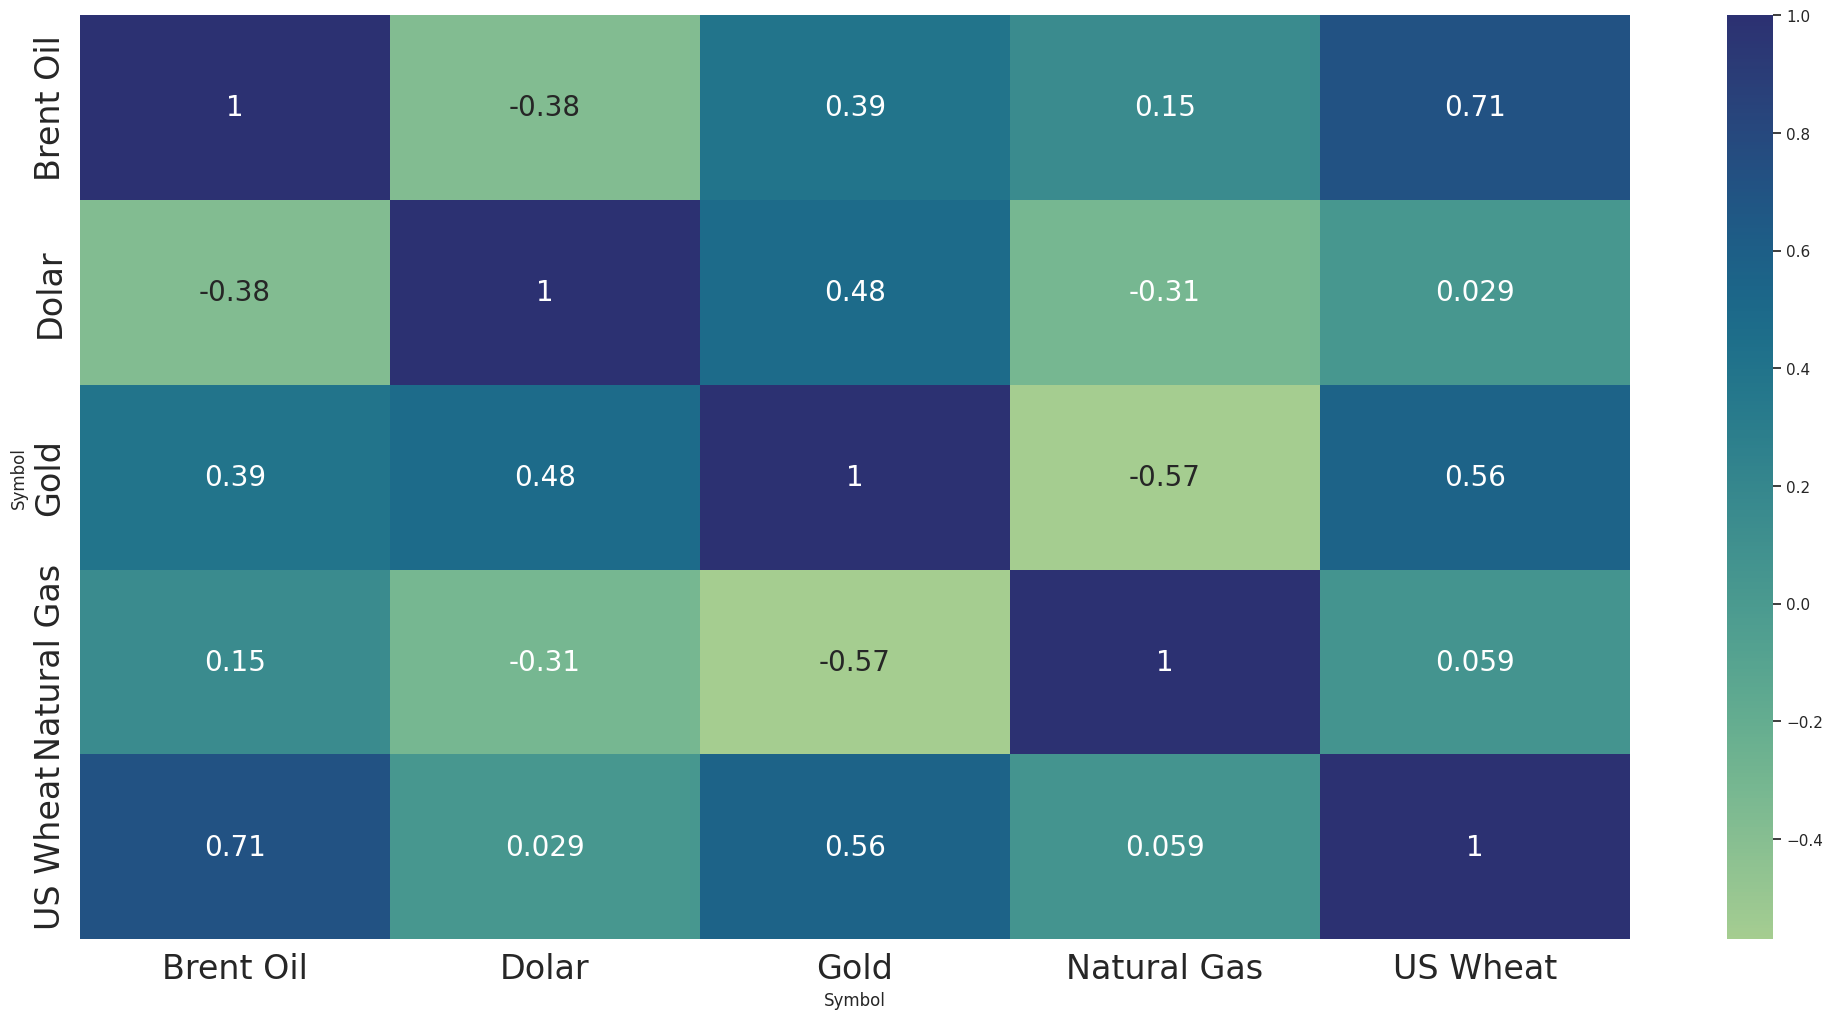

In [ ]:
# plotando as correlações entre os preços das commodities
correlation = df_price.corr(method = 'pearson')
ax = sns.heatmap(correlation, cmap = "crest", annot = True, annot_kws={"size": 20});
ax.set_yticklabels(ax.get_yticklabels(), size=24);
ax.set_xticklabels(ax.get_xticklabels(), size=24);

In [ ]:
# exportando o dataset para um csv
df_price_bi = df_price.reset_index()
df_price_bi.to_csv('df_price_bi.csv', index = False)

# 4.0 Variação percentual entre o valor maior e o valor menor e entre o valor mais recente e o valor mais antigo para cada commodity


In [ ]:
for i in df_price_bi.columns[1:6]:

  # diferença percentual entre os preços mais recentes e mais antigos para cada commodity
  old_index = df_price_bi[i].first_valid_index()
  old_val = df_price_bi[i][old_index]
  rec_index = df_price_bi[i].last_valid_index()
  rec_val = df_price_bi[i][rec_index]
  dif_val = ((rec_val/old_val)-1)*100
  print(f'A diferença percentual do preço mais recente para o preço mais antigo do {i} é de: {np.round(dif_val, 2)}%')

  # diferença percentual entre o maior e o menor preço para cada commodity
  max_val = df_price_bi[i].max()
  min_val = df_price_bi[i].min()
  cre_val = ((max_val/min_val)-1)*100
  print(f'O crescimento percentual entre o maior e o menor preço do {i} é de: {np.round(cre_val, 2)}%\n')


A diferença percentual do preço mais recente para o preço mais antigo do Brent Oil é de: 193.01%
O crescimento percentual entre o maior e o menor preço do Brent Oil é de: 655.72%

A diferença percentual do preço mais recente para o preço mais antigo do Dolar é de: 83.67%
O crescimento percentual entre o maior e o menor preço do Dolar é de: 282.6%

A diferença percentual do preço mais recente para o preço mais antigo do Gold é de: 329.9%
O crescimento percentual entre o maior e o menor preço do Gold é de: 451.99%

A diferença percentual do preço mais recente para o preço mais antigo do Natural Gas é de: -34.45%
O crescimento percentual entre o maior e o menor preço do Natural Gas é de: 937.65%

A diferença percentual do preço mais recente para o preço mais antigo do US Wheat é de: 103.6%
O crescimento percentual entre o maior e o menor preço do US Wheat é de: 402.73%

